In [1]:
# import everything needed
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import pandas_geojson as pdg

# **3. Exploratory Data Analysis**

In [2]:
df = pd.read_csv("SaaS_Sales_Data_Cleaned.csv")
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Contact Name  9994 non-null   object 
 3   Country       9994 non-null   object 
 4   City          9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Subregion     9994 non-null   object 
 7   Customer      9994 non-null   object 
 8   Customer ID   9994 non-null   int64  
 9   Industry      9994 non-null   object 
 10  Segment       9994 non-null   object 
 11  Product       9994 non-null   object 
 12  License       9994 non-null   object 
 13  Sales         9994 non-null   float64
 14  Quantity      9994 non-null   int64  
 15  Discount      9994 non-null   float64
 16  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(12)
memory usage: 1.3+ MB


In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   int64         
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

In [8]:
# To show each column statistic descriptive
display(df.describe(), df.describe(include='object'))

,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,1049.771963,229.858001,3.789574,0.156203,28.656896
min,2020-01-04 00:00:00,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2021-05-23 00:00:00,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,2022-06-27 00:00:00,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,2023-05-15 00:00:00,1076.000000,209.940000,5.000000,0.200000,29.364000
max,2023-12-31 00:00:00,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,29.719388,623.245101,2.225110,0.206452,234.260108


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


In [9]:
# checking lowest Seles
index_min_sales = df['Sales'].idxmin()
df.loc[index_min_sales]

Order ID            APJ-2023-102288
Order Date      2023-06-20 00:00:00
Contact Name            Pippa Brown
Country                       Japan
City                          Tokyo
Region                          APJ
Subregion                      JAPN
Customer                 Volkswagen
Customer ID                    1046
Industry              Manufacturing
Segment                         SMB
Product                     OneView
License                  3X69FF4G6O
Sales                         0.444
Quantity                          1
Discount                        0.8
Profit                        -1.11
Name: 4101, dtype: object

In [11]:
# checking lowest Profit
index_min_profit = df['Profit'].idxmin()
df.loc[index_min_profit]

Order ID           AMER-2022-108196
Order Date      2022-11-26 00:00:00
Contact Name         Faith Campbell
Country                      Mexico
City                        Tijuana
Region                         AMER
Subregion                     LATAM
Customer                   Allstate
Customer ID                    1003
Industry                    Finance
Segment                         SMB
Product             Big Ol Database
License                  PM66ENV0DN
Sales                      4499.985
Quantity                          5
Discount                        0.7
Profit                    -6599.978
Name: 7772, dtype: object

In [12]:
# Checking highest and Lowest Discount
print(f"Highest Discount = {df['Discount'].max()}")
print(f"Lowest Discount = {df['Discount'].min()}")

Highest Discount = 0.8
Lowest Discount = 0.0


In [13]:
Discount_Percent= (df['Discount'] * 100).round(2).astype(str) + '%'

Discount_Percent.unique()

array(['0.0%', '45.0%', '20.0%', '80.0%', '30.0%', '50.0%', '70.0%',
       '60.0%', '32.0%', '10.0%', '40.0%', '15.0%'], dtype=object)

In [14]:
highest_sales_date = df.loc[df['Sales'].idxmax()]['Order Date']
lowest_sales_date = df.loc[df['Sales'].idxmin()]['Order Date']

# Mencari 'Order Date' dengan profit tertinggi dan terendah
highest_profit_date = df.loc[df['Profit'].idxmax()]['Order Date']
lowest_profit_date = df.loc[df['Profit'].idxmin()]['Order Date']

print("Order Date dengan penjualan tertinggi:", highest_sales_date)
print("Order Date dengan penjualan terendah:", lowest_sales_date)
print("Order Date dengan profit tertinggi:", highest_profit_date)
print("Order Date dengan profit terendah:", lowest_profit_date)

Order Date dengan penjualan tertinggi: 2020-03-18 00:00:00
Order Date dengan penjualan terendah: 2023-06-20 00:00:00
Order Date dengan profit tertinggi: 2022-10-03 00:00:00
Order Date dengan profit terendah: 2022-11-26 00:00:00


In [15]:
# Checking Lastest and Newest Date
print(f"Lastest Date = {df['Order Date'].min()}")
print(f"Newest Date = {df['Order Date'].max()}")

Lastest Date = 2020-01-04 00:00:00
Newest Date = 2023-12-31 00:00:00


**Highlight**
<br>
In a detailed analysis of our sales data, several compelling insights emerged that shed light on the performance of our products and the impact of discounts on profitability.

In terms of profitability, the order with the highest recorded profit occurred on June 20, 2023. The order, identified by ID APJ-2023-102288, was placed by Pippa Brown from Tokyo, Japan. This order, placed by the manufacturing giant Volkswagen, involved the purchase of our OneView product. Despite a significant discount of 80%, the sales totaled $0.444, resulting in a profit of -$1.11.

Conversely, the order with the lowest profit was placed on November 26, 2022. Faith Campbell from Tijuana, Mexico, placed an order with ID AMER-2022-108196. The customer, Allstate, operating in the finance sector, purchased our Big Ol Database product. With a discount of 70%, the total sales amounted to $4499.985, but the resulting profit was a significant loss of -$6599.978.

Our discount strategy has been diverse, with percentages ranging from 0% to as high as 80%. The unique discount percentages applied across various transactions include 0.0%, 45.0%, 20.0%, 80.0%, 30.0%, 50.0%, 70.0%, 60.0%, 32.0%, 10.0%, 40.0%, and 15.0%.

Analyzing the order dates revealed some noteworthy trends. The highest sales were recorded on March 18, 2020, while the lowest sales were noted on June 20, 2023. Profit analysis further indicated that the highest profit was achieved on October 3, 2022, whereas the lowest profit was recorded on November 26, 2022.

The dataset spans a broad time frame, with transactions recorded from as early as January 4, 2020, to the most recent date of December 31, 2023.

In summary, our analysis highlights critical aspects of our sales and discount strategies. The data reveals how varying discount percentages significantly impact our profitability and underscores the importance of strategic discount application to optimize financial outcomes.

##### **Checking anomalies/pattern by smallest Seles**

In [16]:
#grouping profit, qty, discount by Sales
smallest_sales = df.groupby(['Order Date','Sales']).agg({'Profit': 'sum', 'Quantity': 'sum', 'Discount': 'min'}).sort_values(by='Sales', ascending=True).reset_index()

# Total profit
total_profit = smallest_sales['Profit'].sum()

# Counting precentage profit
smallest_sales['Profit'] = ((smallest_sales['Profit'] / total_profit) * 100).round(2).astype(str) + '%'

# Formating Qty as Unit
smallest_sales['Quantity'] = smallest_sales['Quantity'].apply(lambda x: f'{x} pcs')

smallest_sales

,Order Date,Sales,Profit,Quantity,Discount
0,2023-06-20,0.444,-0.0%,1 pcs,0.8
1,2023-03-03,0.556,-0.0%,1 pcs,0.8
2,2022-06-22,0.836,-0.0%,1 pcs,0.8
3,2020-03-31,0.852,-0.0%,1 pcs,0.7
4,2020-09-26,0.876,-0.0%,1 pcs,0.8
...,...,...,...,...,...
9976,2023-11-18,10499.970,1.76%,3 pcs,0.0
9977,2023-10-23,11199.968,1.37%,4 pcs,0.2
9978,2023-03-24,13999.960,2.35%,4 pcs,0.0
9979,2022-10-03,17499.950,2.93%,5 pcs,0.0


The first five entries show high discount levels (ranging from 0.7 to 0.8) with no profit (0.0% profit). This indicates that these high discounts are likely not translating into profitability.
<br>
Some higher sales entries (e.g., $10499.97 with 1.76% profit, $11199.968 with 1.37% profit) show positive profit percentages, suggesting that at certain levels, discounts can be effective.
<br>
However, there are also entries with negative profit percentages even for high sales (e.g., $22638.48 with -0.63% profit), indicating that in some cases, the discounts are not leading to profitability.

##### Will using a discount affect profits?

##### **Checking anomalies/pattern by highest Seles**

In [17]:
#grouping profit, qty, discount by Sales
highest_sales = df.groupby(['Order Date','Sales']).agg({'Profit': 'sum', 'Quantity': 'sum', 'Discount': 'max'}).sort_values(by='Sales', ascending=False).reset_index()

# Total profit
total_profit = highest_sales['Profit'].sum()

# Counting precentage profit
highest_sales['Profit'] = ((highest_sales['Profit'] / total_profit) * 100).round(2).astype(str) + '%'

# Formating Qty as Unit
highest_sales['Quantity'] = highest_sales['Quantity'].apply(lambda x: f'{x} pcs')

highest_sales.head()

,Order Date,Sales,Profit,Quantity,Discount
0,2020-03-18,22638.480,-0.63%,6 pcs,0.5
1,2022-10-03,17499.950,2.93%,5 pcs,0.0
2,2023-03-24,13999.960,2.35%,4 pcs,0.0
3,2023-10-23,11199.968,1.37%,4 pcs,0.2
4,2023-11-18,10499.970,1.76%,3 pcs,0.0


### The assumption is that, despite achieving the highest sales figures, the use of discounts has a negative impact on profits

##### *Lets check lowest **profit**, are there any discount applied?*

In [18]:
# Grouping Lowest Profit with agg Discount, Sales
smallest_profit = df.groupby(['Order Date','Profit']).agg({'Discount': 'sum','Sales': 'sum','Quantity': 'sum'}).sort_values(by='Profit', ascending=True).reset_index()

total_profit = smallest_profit['Profit'].sum()

# Formatting 'Sales' as dollar values
smallest_profit['Sales'] = smallest_profit['Sales'].apply(lambda x: f'${x:,.3f}')
smallest_profit['Profit'] = ((smallest_profit['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
smallest_profit['Discount'] = (smallest_profit['Discount'] * 100).round(2).astype(str)+'%'
smallest_profit['Quantity'] = smallest_profit['Quantity'].apply(lambda x: f'{x} pcs')

smallest_profit.head()

,Order Date,Profit,Discount,Sales,Quantity
0,2022-11-26,-2.3%,70.0%,"$4,499.985",5 pcs
1,2023-11-05,-1.34%,50.0%,"$7,999.980",4 pcs
2,2020-07-26,-1.29%,80.0%,"$2,177.584",8 pcs
3,2023-04-18,-1.19%,70.0%,"$2,549.985",5 pcs
4,2023-12-08,-1.02%,80.0%,"$1,889.990",5 pcs


In [19]:
# extract year to month
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# calculate profit in every month
monthly_total_profit = df.groupby(['YearMonth']).agg({'Profit': 'sum', 'Discount': 'mean', 'Sales': 'sum', 'Quantity': 'sum'}).sort_values(by='Profit', ascending=True).reset_index()

# lowest sorting
monthly_total_profit_sorted = monthly_total_profit.sort_values(by='Profit', ascending=True)
monthly_total_profit_sorted['Sales'] = monthly_total_profit_sorted['Sales'].apply(lambda x: f'${x:,.3f}')
monthly_total_profit_sorted['Profit'] = ((monthly_total_profit_sorted['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
monthly_total_profit_sorted['Discount'] = (monthly_total_profit_sorted['Discount'] * 100).round(2).astype(str)+'%'
monthly_total_profit_sorted['Quantity'] = monthly_total_profit_sorted['Quantity'].apply(lambda x: f'{x} pcs')

monthly_total_profit_sorted.head()

,YearMonth,Profit,Discount,Sales,Quantity
0,2021-01,-1.15%,17.79%,"$18,174.076",236 pcs
1,2020-07,-0.29%,17.17%,"$33,946.393",550 pcs
2,2020-03,0.17%,16.75%,"$55,691.009",585 pcs
3,2020-02,0.3%,17.55%,"$4,810.558",161 pcs
4,2023-02,0.56%,18.54%,"$20,283.513",360 pcs


##### *Lets check Highest **profit**, are there any discount applied?*

In [20]:
# Grouping Highest Profit with agg Discount, Sales
highest_profit = df.groupby(['Order Date','Profit']).agg({'Discount': 'sum','Sales': 'sum','Quantity': 'sum'}).sort_values(by='Profit', ascending=False).reset_index()

total_profit = highest_profit['Profit'].sum()

# Formatting 'Sales' as dollar values
highest_profit['Sales'] = highest_profit['Sales'].apply(lambda x: f'${x:,.3f}')
highest_profit['Profit'] = ((highest_profit['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
highest_profit['Discount'] = (highest_profit['Discount'] * 100).round(2).astype(str)+'%'
highest_profit['Quantity'] = highest_profit['Quantity'].apply(lambda x: f'{x} pcs')

highest_profit.head()

,Order Date,Profit,Discount,Sales,Quantity
0,2022-10-03,2.93%,0.0%,"$17,499.950",5 pcs
1,2023-03-24,2.35%,0.0%,"$13,999.960",4 pcs
2,2023-11-18,1.76%,0.0%,"$10,499.970",3 pcs
3,2022-12-18,1.73%,0.0%,"$9,892.740",13 pcs
4,2020-09-23,1.62%,0.0%,"$9,449.950",5 pcs


In [21]:
# calculate profit in every month
monthly_total_profit_high = df.groupby(['YearMonth']).agg({'Profit': 'sum', 'Discount': 'mean', 'Sales': 'sum', 'Quantity': 'sum'}).sort_values(by='Profit', ascending=False).reset_index()

monthly_total_profit_high_sorted = monthly_total_profit_high.sort_values(by='Profit', ascending=False)
monthly_total_profit_high_sorted['Sales'] = monthly_total_profit_high_sorted['Sales'].apply(lambda x: f'${x:,.3f}')
monthly_total_profit_high_sorted['Profit'] = ((monthly_total_profit_high_sorted['Profit'] / total_profit) * 100).round(2).astype(str)+'%'
monthly_total_profit_high_sorted['Discount'] = (monthly_total_profit_high_sorted['Discount'] * 100).round(2).astype(str)+'%'
monthly_total_profit_high_sorted['Quantity'] = monthly_total_profit_high_sorted['Quantity'].apply(lambda x: f'{x} pcs')

monthly_total_profit_high_sorted.head()

,YearMonth,Profit,Discount,Sales,Quantity
0,2022-12,6.25%,13.33%,"$97,237.417",1404 pcs
1,2022-10,5.5%,15.34%,"$56,463.130",740 pcs
2,2023-03,4.52%,12.87%,"$53,908.962",825 pcs
3,2021-11,4.36%,16.23%,"$75,972.564",1310 pcs
4,2023-09,3.98%,14.7%,"$90,488.722",1676 pcs


**Insights**
<br>
**Discount Impact**: High discount percentages (50%-80%) are consistently associated with negative profit margins, indicating that such discounts are detrimental to profitability.
<br>
**Profit without Discounts**: Conversely, transactions without discounts show consistently positive profit percentages, suggesting that avoiding discounts can significantly enhance profitability.
This analysis highlights the critical role of discount strategies in impacting profit especially in countries.

##### **The assumption is that the company will achieve a positive profit, there is no/less discounts. However, when there is a discount, the company will incur a negative profit.**

# **Analysis of the Effect of Discounts on Profit**

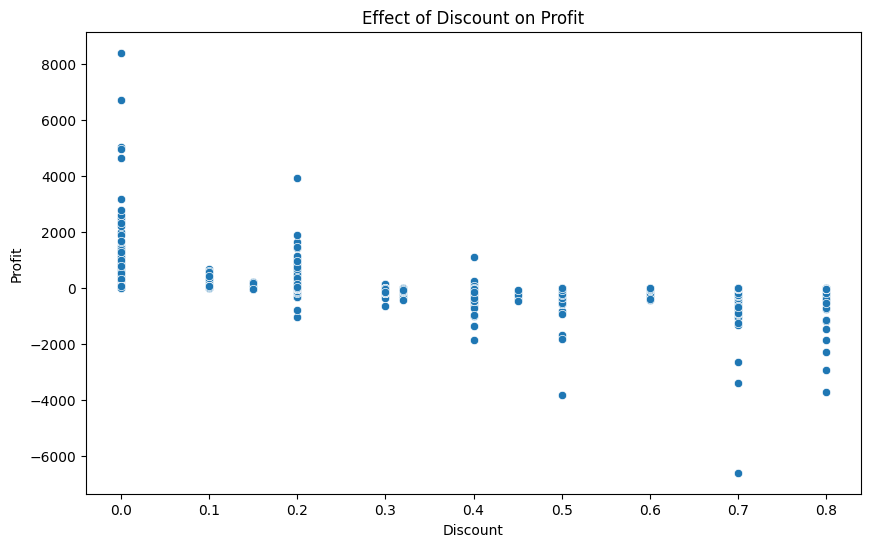

Correlation between Discount and Profit: -0.22


In [22]:
# Scatter plot to visualize the relationship between Discount and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Effect of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

# Calculate correlation
correlation = df['Discount'].corr(df['Profit'])
print(f"Correlation between Discount and Profit: {correlation:.2f}")

##### Based on the analysis, the correlation coefficient between Discount and Profit is -0.22. This indicates a weak negative correlation between the two variables. In other words, as discounts increase, profits tend to decrease slightly, but the relationship is not strong. Therefore, discounting strategy should be carefully balanced to avoid negatively impacting overall profitability

In [23]:
# Simulate profit with and without Discount
df['Discounted'] = df['Discount'] > 0

profit_stats = df.groupby('Discounted')['Profit'].describe()

# Transpose the DataFrame
transposed_profit_stats = profit_stats.T
transposed_profit_stats

Discounted,False,True
count,4798.000000,5196.000000
mean,66.900292,-6.657156
std,257.055445,204.813523
min,0.000000,-6599.978000
25%,6.575400,-8.078400
50%,15.995200,3.340800
75%,50.365800,14.684050
max,8399.976000,3919.988800


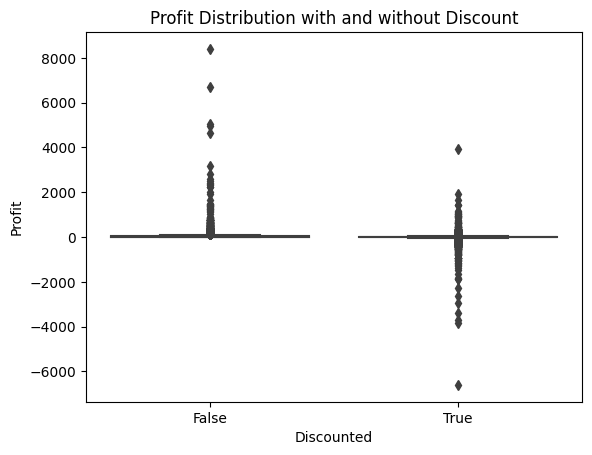

In [24]:
# Boxplot Visualization Profit by Discounted
sns.boxplot(x='Discounted', y='Profit', data=df)
plt.title('Profit Distribution with and without Discount')
plt.show()

**Without Discount (Discounted = False):**
- Count: 4798
- Mean Profit: 66.90
- Standard Deviation: 257.06
- Minimum Profit: 0.00
- 25th Percentile (Q1): 6.58
- Median Profit (Q2): 16.00
- 75th Percentile (Q3): 50.37
- Maximum Profit: 8399.98

**With Discount (Discounted = True):**
- Count: 5196
- Mean Profit: -6.66
- Standard Deviation: 204.81
- Minimum Profit: -6599.98
- 25th Percentile (Q1): -8.08
- Median Profit (Q2): 3.34
- 75th Percentile (Q3): 14.68
- Maximum Profit: 3919.99

**Summary:**
- **Without Discounts**: The average profit is relatively high at 66.90, with a broad distribution indicated by a high standard deviation of 257.06. The median profit is 16.00, and profits range from 0.00 to 8399.98.

- **With Discounts**: The average profit is negative at -6.66, suggesting that discounts are generally associated with a decrease in profit. The standard deviation is also high at 204.81, indicating variability in profit outcomes. The median profit is 3.34, but the range includes significant losses, with a minimum profit of -6599.98 and a maximum profit of 3919.99.
These statistics indicate that applying discounts can lead to a substantial decrease in average profit and introduce more variability, including the potential for significant losses.

# **Analyze Effect of Discounts on Profitability in Low-Profit Countries**

In [25]:
# Group by Country and calculate the total profit for each country
country_profit = df.groupby('Country')['Profit'].sum()

# Sort countries by total profit in descending order
country_profit_sorted = country_profit.sort_values(ascending=False).reset_index()
country_profit_sorted

,Country,Profit
0,United States,76381.3871
1,United Kingdom,74989.0891
2,Canada,33402.6517
3,Brazil,24463.1876
4,Spain,18597.9504
5,India,18382.9363
6,Finland,16250.0433
7,Luxembourg,10823.1874
8,Ireland,10249.1561
9,Philippines,9977.3748


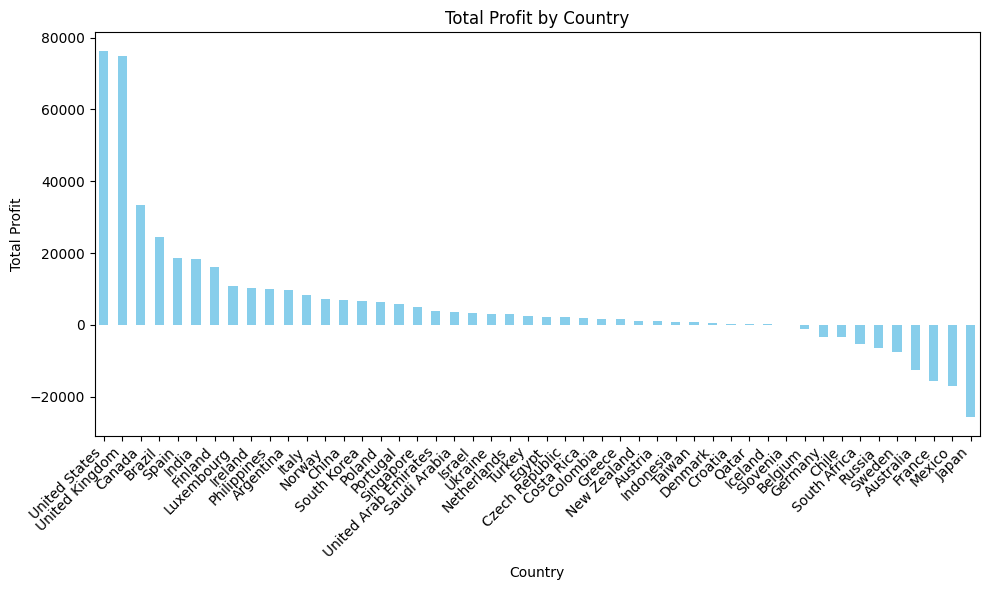

In [26]:
# Plotting
# Sort countries by total profit in descending order
country_profit_sorted = country_profit.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
country_profit_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observations:**

- High Performers: The United States and the United Kingdom stand out as the highest-performing countries, boasting profits exceeding $70,000.

- Low Performers: France and Mexico are notable for their significant negative profits, with Japan registering the highest loss at -$25,729.36.
<br>
Profit Distribution: The data reveals a broad distribution of profits across different countries, indicating varying levels of market performance and highlighting potential issues in lower-performing regions.

- This analysis identifies areas for potential improvement or further investigation, particularly focusing on Low Performers.

In [27]:
# Sort countries by total profit in ascending order and select the top 3
top_5_countries_lowest_profit = country_profit.reset_index().sort_values(by='Profit').head(5)
top_5_countries_lowest_profit.columns = ['Country', 'Total Profit']
top_5_countries_lowest_profit

,Country,Total Profit
24,Japan,-25729.3563
26,Mexico,-16971.3766
15,France,-15559.9603
1,Australia,-12607.8870
41,Sweden,-7490.9122


In [28]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Year'] = df['Order Date'].dt.to_period('Y')
df[['Order Date', 'Order Month', 'Order Year']].head()

,Order Date,Order Month,Order Year
0,2022-11-09,2022-11,2022
1,2022-11-09,2022-11,2022
2,2022-06-13,2022-06,2022
3,2021-10-11,2021-10,2021
4,2021-10-11,2021-10,2021


In [179]:
# df = df.drop(columns=['Order Month', 'Order Year'])

#### **Filter data for Country == Japan**

In [29]:
# Filter data for Country == Japan
japan_profit = df[df['Country'] == 'Japan']

# Group by Order Year and calculate total profit for each year
profit_by_year = japan_profit.groupby('Order Year')[['Profit']].sum().reset_index()
profit_by_year

,Order Year,Profit
0,2020,-9135.0140
1,2021,-2516.1825
2,2022,-5239.6549
3,2023,-8838.5049


In [181]:
#calculate average_discount_per_order_per_year

total_transactions_japan = df[df['Country'] == 'Japan'].groupby('Order Year')['Order ID'].count()
average_discount_per_order_per_year = df[(df['Country'] == 'Japan') & (df['Discount'] > 0)].groupby('Order Year')['Discount'].mean()
print(total_transactions_japan)
print(average_discount_per_order_per_year)

Order Year
2020    217
2021    203
2022    248
2023    317
Freq: A-DEC, Name: Order ID, dtype: int64
Order Year
2020    0.369401
2021    0.386404
2022    0.343629
2023    0.381136
Freq: A-DEC, Name: Discount, dtype: float64


In [30]:
display(df[df['Country'] == 'Japan'].describe())

,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,985,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2022-04-06 18:13:31.370558464,1051.781726,172.779742,3.780711,0.370193,-26.121174
min,2020-01-04 00:00:00,1002.000000,0.444000,1.000000,0.200000,-3701.892800
25%,2021-03-31 00:00:00,1024.000000,10.824000,2.000000,0.200000,-17.027400
50%,2022-06-13 00:00:00,1052.000000,36.288000,3.000000,0.200000,0.333600
75%,2023-04-17 00:00:00,1078.000000,158.376000,5.000000,0.600000,6.998600
max,2023-12-29 00:00:00,1101.000000,8159.952000,14.000000,0.800000,624.987500
std,NaN,29.956983,424.447771,2.158043,0.243362,189.022781


**Highlight**


The profit trends in Japan show fluctuations across the years, reflecting varying economic conditions and market dynamics. In 2020, the profit plunged to -9135.0140, indicating a challenging period for businesses. Despite a slight improvement in 2021, where the profit increased to -2516.1825, the subsequent years witnessed further declines, with profits dropping to -5239.6549 in 2022 and a substantial decrease to -8838.5049 in 2023. These trends suggest potential economic challenges or shifts in consumer behavior impacting business performance.

Interestingly, the average discount per order per year remained consistently high, suggesting a prevalent usage of discounts in transactions throughout the years. In 2020, the average discount per order was 0.369401, slightly increasing to 0.386404 in 2021. Despite a slight dip to 0.343629 in 2022, the average discount rebounded to 0.381136 in 2023.

**Fluctuations in the use of discounts have a big impact on profits, promotional strategies used by businesses operating in Japan instead want to attract customers but do not consider profits which are always negative.**

#### **Filter data for Country == Mexico**

In [183]:
# Filter data for Country == Mexico
mexico_profit = df[df['Country'] == 'Mexico']

# Group by Order Year and calculate total profit for each year
profit_by_year = mexico_profit.groupby('Order Year')[['Profit']].sum().reset_index()
profit_by_year

,Order Year,Profit
0,2020,-2131.0641
1,2021,-5500.8902
2,2022,-7567.6801
3,2023,-1771.7422


In [184]:
# calculate average_discount_per_order_per_year

total_transactions_mexico = df[df['Country'] == 'Mexico'].groupby('Order Year')['Order ID'].count()
m_average_discount_per_order_per_year = df[(df['Country'] == 'Mexico') & (df['Discount'] > 0)].groupby('Order Year')['Discount'].mean()
print(total_transactions_mexico)
print(m_average_discount_per_order_per_year)

Order Year
2020     93
2021     83
2022    131
2023    162
Freq: A-DEC, Name: Order ID, dtype: int64
Order Year
2020    0.335484
2021    0.337349
2022    0.312977
2023    0.322222
Freq: A-DEC, Name: Discount, dtype: float64


In [185]:
display(df[df['Country'] == 'Mexico'].describe())

,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,469,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2022-05-21 00:00:00.000000256,1055.407249,166.861697,3.750533,0.324947,-36.186304
min,2020-01-14 00:00:00,1002.000000,1.448000,1.000000,0.200000,-6599.978000
25%,2021-04-16 00:00:00,1029.000000,14.480000,2.000000,0.200000,-13.393600
50%,2022-09-06 00:00:00,1054.000000,44.376000,3.000000,0.200000,1.239000
75%,2023-05-29 00:00:00,1082.000000,155.372000,5.000000,0.400000,7.700000
max,2023-12-28 00:00:00,1101.000000,4499.985000,14.000000,0.700000,607.608000
std,NaN,29.714353,353.261659,2.210993,0.188097,341.346473


**Highlight**

In Mexico, the profit trends also exhibit fluctuations across the years. In 2020, the profit was -2131.0641, indicating a relatively moderate level of profitability. However, the subsequent years experienced declines, with profits decreasing to -5500.8902 in 2021 and further dropping to -7567.6801 in 2022. Interestingly, there was a slight improvement in 2023, where the profit increased to -1771.7422, suggesting potential economic recovery or shifts in business strategies.

Similar to Japan, Mexico also demonstrates a consistent usage of discounts in transactions across the years, as indicated by the average discount per order per year. The average discount per order was 0.335484 in 2020, slightly increasing to 0.337349 in 2021. Despite a slight decrease to 0.312977 in 2022, the average discount rebounded to 0.322222 in 2023.

**Similar with Japan promotional strategies used by businesses operating in Japan instead want to attract customers but do not consider profits which are always negative.**

### **Filter Data for Country == France**

In [186]:
# Filter data for Country == France
france_profit = df[df['Country'] == 'France']

# Group by Order Year and calculate total profit for each year
profit_by_year = france_profit.groupby('Order Year')[['Profit']].sum().reset_index()
profit_by_year

,Order Year,Profit
0,2020,-2361.8177
1,2021,-3900.3451
2,2022,-4184.9941
3,2023,-5112.8034


In [187]:
# calculate average_discount_per_order_per_year

total_transactions_france = df[df['Country'] == 'France'].groupby('Order Year')['Order ID'].count()
f_average_discount_per_order_per_year = df[(df['Country'] == 'France') & (df['Discount'] > 0)].groupby('Order Year')['Discount'].mean()
print(total_transactions_france)
print(f_average_discount_per_order_per_year)

Order Year
2020    115
2021    137
2022    138
2023    197
Freq: A-DEC, Name: Order ID, dtype: int64
Order Year
2020    0.320870
2021    0.321168
2022    0.334783
2023    0.334010
Freq: A-DEC, Name: Discount, dtype: float64


In [188]:
display(df[df['Country'] == 'France'].describe())

,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,587,587.000000,587.000000,587.000000,587.000000,587.000000
mean,2022-04-21 05:55:42.419080192,1050.257240,198.487077,3.667802,0.328620,-26.507598
min,2020-01-06 00:00:00,1001.000000,0.852000,1.000000,0.200000,-1665.052200
25%,2021-05-08 12:00:00,1024.000000,12.672000,2.000000,0.200000,-17.599800
50%,2022-06-03 00:00:00,1050.000000,41.472000,3.000000,0.200000,0.584000
75%,2023-05-11 12:00:00,1078.000000,175.093000,5.000000,0.400000,5.946150
max,2023-12-19 00:00:00,1101.000000,8399.976000,14.000000,0.700000,1119.996800
std,NaN,29.543228,531.058157,2.179732,0.189661,136.294675


**Highlight**

In France, the profit trends exhibit a consistent decline over the years. In 2020, the profit was -2361.8177, indicating a moderate level of profitability. However, the subsequent years experienced further declines, with profits decreasing to -3900.3451 in 2021, -4184.9941 in 2022, and reaching the lowest point at -5112.8034 in 2023. 

Similarly to Japan and Mexico, France also demonstrates a consistent usage of discounts in transactions across the years, as indicated by the average discount per order per year. The average discount per order was 0.320870 in 2020, slightly increasing to 0.321168 in 2021. Despite a slight increase to 0.334783 in 2022, the average discount remained relatively stable at 0.334010 in 2023. This consistent usage of discounts suggests that businesses in France employ promotional strategies consistently to drive sales and attract customers, 

### **Filter Data for Country == Australia**

In [31]:
# Filter data for Country == Australia
Australia_profit = df[df['Country'] == 'Australia']

# Group by Order Year and calculate total profit for each year
profit_by_year = Australia_profit.groupby('Order Year')[['Profit']].sum().reset_index()
profit_by_year

,Order Year,Profit
0,2020,-2043.7367
1,2021,-1009.4964
2,2022,-2809.0939
3,2023,-6745.5600


In [32]:
#calculate average_discount_per_order_per_year

total_transactions_Australia = df[df['Country'] == 'Australia'].groupby('Order Year')['Order ID'].count()
average_discount_per_order_per_year = df[(df['Country'] == 'Australia') & (df['Discount'] > 0)].groupby('Order Year')['Discount'].mean()
print(total_transactions_Australia)
print(average_discount_per_order_per_year)

Order Year
2020    105
2021     94
2022    121
2023    172
Freq: A-DEC, Name: Order ID, dtype: int64
Order Year
2020    0.409524
2021    0.376596
2022    0.398347
2023    0.379651
Freq: A-DEC, Name: Discount, dtype: float64


In [33]:
display(df[df['Country'] == 'Australia'].describe())


,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,492,492.000000,492.00000,492.000000,492.000000,492.000000
mean,2022-04-25 16:58:32.195121920,1050.329268,162.93923,3.750000,0.390041,-25.625787
min,2020-01-05 00:00:00,1001.000000,0.83600,1.000000,0.200000,-2929.484500
25%,2021-05-08 12:00:00,1024.000000,11.20100,2.000000,0.200000,-18.398475
50%,2022-06-03 00:00:00,1051.000000,36.56800,3.000000,0.200000,-1.814400
75%,2023-05-19 06:00:00,1075.000000,180.25200,5.000000,0.600000,5.647800
max,2023-12-29 00:00:00,1101.000000,2799.96000,14.000000,0.800000,874.987500
std,NaN,28.930095,317.12294,2.153125,0.245120,175.695233


**Profit Analysis in Australia**

The data indicates a consistent decline in profits for Australia over the four-year period from 2020 to 2023. Here's a breakdown of the yearly profits:

2020: The year started with a negative profit of -2043.7367.
2021: There was a slight improvement, yet still negative, with a profit of -1009.4964.
2022: Profits dipped further to -2809.0939.
2023: The worst year in the period, with a significant loss of -6745.5600.4

**Discount Proportions:**
The total number of discounts given each year shows an increasing trend:

2020: 105 discounts
2021: 94 discounts
2022: 121 discounts
2023: 172 discounts
Despite the rising number of discounts, the profits have continuously declined, indicating that the increased use of discounts has not translated into financial gains.

**Discount Percentage Proportions:**
The average discount percentages remained relatively stable across the years:

2020: 40.95%
2021: 37.66%
2022: 39.83%
2023: 37.97%

Even though the discount percentage slightly fluctuated around 38-40%, it did not significantly impact the trend of increasing losses.

**Summary**
The data highlights a critical issue for the Australian market: despite offering more discounts over the years, the profits have drastically declined. The increase in the number of discounts given (from 105 in 2020 to 172 in 2023) and the relatively stable discount percentage (around 38-40%) suggest that the current discount strategy might not be effective in boosting profitability. This calls for a re-evaluation of the discounting approach to prevent further financial deterioration.

### **Filter Data for Country == Sweden**

In [34]:
# Filter data for Country == Sweden
Sweden_profit = df[df['Country'] == 'Sweden']

# Group by Order Year and calculate total profit for each year
profit_by_year = Sweden_profit.groupby('Order Year')[['Profit']].sum().reset_index()
profit_by_year

,Order Year,Profit
0,2020,-1415.0991
1,2021,-1248.1208
2,2022,260.8411
3,2023,-5088.5334


In [35]:
#calculate average_discount_per_order_per_year

total_transactions_Sweden = df[df['Country'] == 'Sweden'].groupby('Order Year')['Order ID'].count()
average_discount_per_order_per_year = df[(df['Country'] == 'Sweden') & (df['Discount'] > 0)].groupby('Order Year')['Discount'].mean()
print(total_transactions_Sweden)
print(average_discount_per_order_per_year)


Order Year
2020    43
2021    47
2022    74
2023    85
Freq: A-DEC, Name: Order ID, dtype: int64
Order Year
2020    0.265116
2021    0.300000
2022    0.282432
2023    0.284706
Freq: A-DEC, Name: Discount, dtype: float64


In [36]:
display(df[df['Country'] == 'Sweden'].describe())


,Order Date,Customer ID,Sales,Quantity,Discount,Profit
count,249,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2022-05-31 00:23:07.951807232,1045.124498,223.305880,3.947791,0.283534,-30.083985
min,2020-03-03 00:00:00,1001.000000,1.752000,1.000000,0.200000,-3839.990400
25%,2021-07-05 00:00:00,1019.000000,15.984000,2.000000,0.200000,-2.625600
50%,2022-08-16 00:00:00,1043.000000,45.216000,3.000000,0.200000,3.959200
75%,2023-05-28 00:00:00,1072.000000,189.588000,5.000000,0.200000,15.590400
max,2023-12-19 00:00:00,1101.000000,7999.980000,14.000000,0.700000,303.804000
std,NaN,29.302176,648.754454,2.443161,0.178959,297.900997


**Profit Analysis in Sweden**

The profit data for Sweden over the four-year period from 2020 to 2023 shows fluctuating performance:

2020: The year started with a negative profit of -1415.0991.
2021: There was a slight improvement but still negative, with a profit of -1248.1208.
2022: A notable turnaround, with a positive profit of 260.8411.
2023: A significant decline, with a large loss of -5088.5334.

**Discount Proportions:**

The total number of discounts given each year shows an increasing trend:

2020: 43 discounts
2021: 47 discounts
2022: 74 discounts
2023: 85 discounts
The increase in the number of discounts provided each year is evident, yet the profit trend does not consistently align with this increase.

**Discount Percentage Proportions**

The average discount percentages remained relatively stable across the years:

2020: 26.51%
2021: 30.00%
2022: 28.24%
2023: 28.47%

Despite the rising number of discounts and the relatively stable discount percentage (around 26-30%), the profit trend does not show a consistent improvement, especially with the significant loss in 2023.

**Summary:**
The data for Sweden reveals a mixed performance in terms of profitability despite the increasing number of discounts. While there was a positive profit in 2022, the overall trend indicates instability, culminating in a substantial loss in 2023. The discount percentages have been stable, but the effectiveness of these discounts in driving profit needs re-evaluation. The sharp decline in profit in 2023, despite a high number of discounts, suggests that the current discount strategy may not be yielding the desired financial benefits. This highlights the need for a strategic reassessment to stabilize and improve profitability.

## **Pivot Table Simulation to calculate Profit without and using Discount**

To mathematically calculate or simulate the profit without using discounts, we need to consider the formula for profit, which typically is:

**{Profit} = {Sales} - {Cost}**

If discounts are applied, the sales value would be reduced by the discount amount. Therefore, to simulate the profit without discounts, we need to remove the effect of the discount from the sales.

Given the columns in wer DataFrame (`Sales`, `Discount`, and `Profit`), we can calculate the hypothetical profit without the discount. Assuming the `Discount` column represents the discount rate (e.g., 0.1 for 10%), we can do this as follows:

1. Calculate the sales without discount.
2. Recalculate the profit using these adjusted sales values.

In [39]:
# Calculate Sales without Discount
df['Sales_Without_Discount'] = df['Sales'] / (1 - df['Discount'])

# Assume Profit = Sales - Cost, and we want to find Cost:
df['Cost'] = df['Sales'] - df['Profit']

# Calculate the hypothetical profit without discount
df['Hypothetical_Profit_Without_Discount'] = df['Sales_Without_Discount'] - df['Cost']

In [40]:
# Group countries based on total real profit and hypothetical profit without discounts
total_profit_original = df.groupby('Country')['Profit'].sum()
total_profit_hypothetical = df.groupby('Country')['Hypothetical_Profit_Without_Discount'].sum()

# Combine the result for camparasion
comparison = pd.DataFrame({
    'Total Profit Original': total_profit_original,
    'Total Profit Hypothetical Without Discount': total_profit_hypothetical
})

comparison
comparison_sorted_country = comparison.sort_values(by='Total Profit Original', ascending=True)
comparison_sorted_country

,Total Profit Original,Total Profit Hypothetical Without Discount
Country,,
Japan,-25729.3563,83366.2279
Mexico,-16971.3766,39645.9274
France,-15559.9603,55348.5757
Australia,-12607.8870,40654.9620
Sweden,-7490.9122,25247.5938
Russia,-6527.8579,13854.8941
South Africa,-5341.6936,16193.5334
Chile,-3427.9246,16035.9944
Germany,-3399.3017,48204.5803


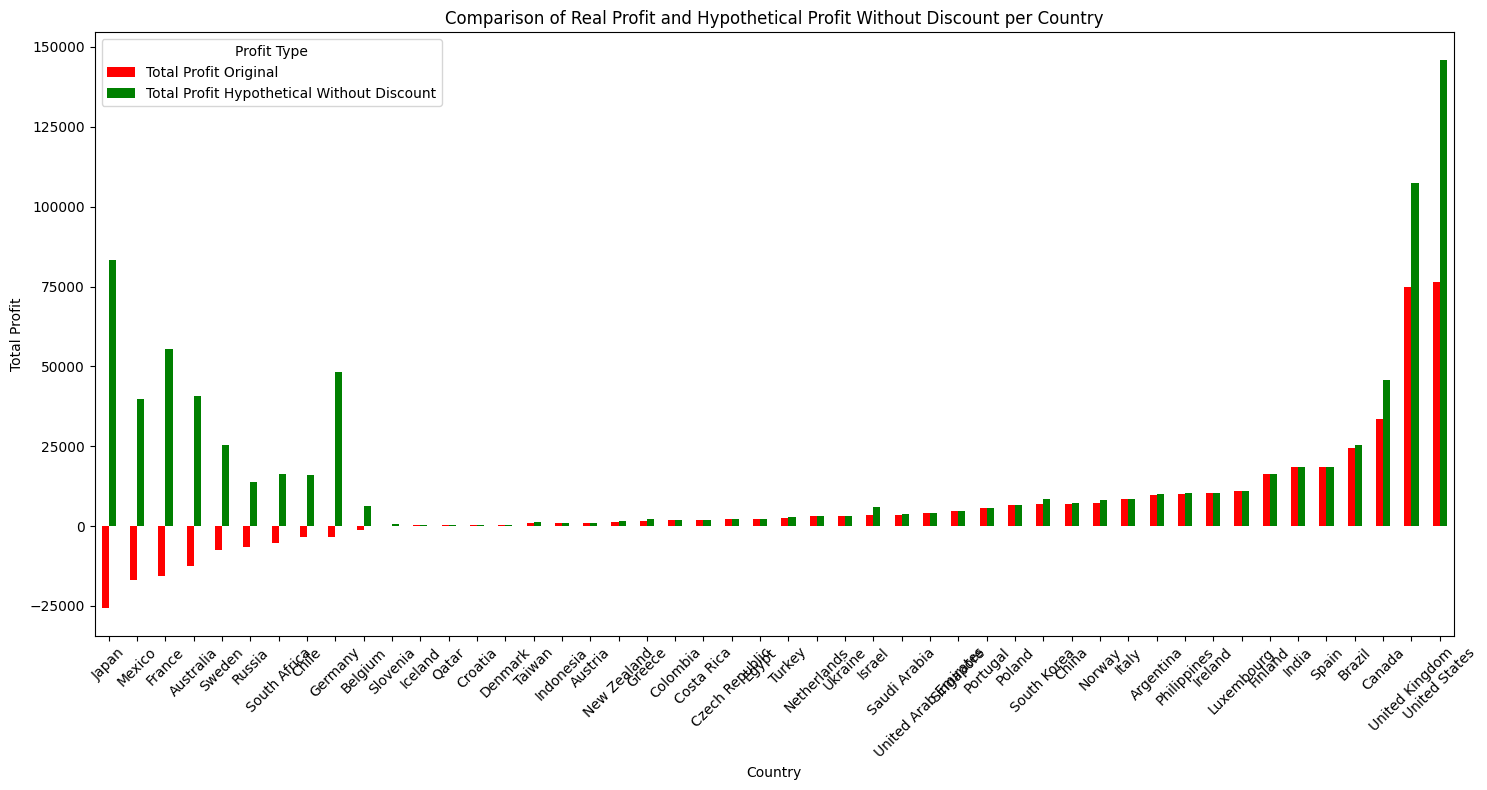

In [41]:
comparison_sorted_country.plot(kind='bar', figsize=(15, 8), color=['red', 'green'])
plt.title('Comparison of Real Profit and Hypothetical Profit Without Discount per Country')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.legend(title='Profit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####  identify the top 5 countries with the most significant increase in profit when not using discounts

In [42]:
# Calculate the profit difference
comparison['Profit Difference'] = comparison['Total Profit Hypothetical Without Discount'] - comparison['Total Profit Original']

# Sort by the profit difference in descending order
comparison_sorted_country = comparison.sort_values(by='Profit Difference', ascending=False)

# Get the top 3 countries with the most significant increase in profit
top_5_countries = comparison_sorted_country.head(6)

top_5_countries

,Total Profit Original,Total Profit Hypothetical Without Discount,Profit Difference
Country,,,
Japan,-25729.3563,83366.2279,109095.5842
France,-15559.9603,55348.5757,70908.5360
United States,76381.3871,145994.3656,69612.9785
Mexico,-16971.3766,39645.9274,56617.3040
Australia,-12607.8870,40654.9620,53262.8490
Germany,-3399.3017,48204.5803,51603.8820


In [43]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,...,Quantity,Discount,Profit,YearMonth,Discounted,Order Month,Order Year,Sales_Without_Discount,Cost,Hypothetical_Profit_Without_Discount
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,...,2,0.00,41.9136,2022-11,False,2022-11,2022,261.96,220.0464,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,...,3,0.00,219.5820,2022-11,False,2022-11,2022,731.94,512.3580,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,...,2,0.00,6.8714,2022-06,False,2022-06,2022,14.62,7.7486,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,...,5,0.45,-383.0310,2021-10,True,2021-10,2021,1741.05,1340.6085,400.4415
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,...,2,0.20,2.5164,2021-10,True,2021-10,2021,27.96,19.8516,8.1084


A summary of the calculation results shows that for each country that initially had negative total profits, the hypothetical profits without discounts became positive. This indicates that discounts have a significant impact on reducing profits. The following is a summary and interpretation of the results:

- High Performers: The United States and the United Kingdom stand out as the highest-performing countries, boasting profits exceeding $70,000. Some countries exhibit moderate improvements in profitability when discounts are removed, suggesting potential benefits from revising discount strategies.

- Low Performers: Countries like Japan, Mexico, and France, which originally showed substantial losses (-$25,729.36, -$16,971.38, and -$15,559.96 respectively), demonstrate significant hypothetical profits without discounts ($83,366.23, $39,645.93, and $55,348.58 respectively). This highlights the detrimental impact of current discount strategies in these regions.
<br>

**Japan**
- Total Original Profit: -25,729.36
- Total Hypothetical Profit Without Discount: 83,366.23
- Interpretation: 
<br>
The original total profit is negative at -25729.3563, while the hypothetical total profit without discounts is 83366.2279. The profit difference is substantial, at -109095.5842. The profit sensitivity is -1.892809, indicating that the use of discounts significantly impacts profit in Japan.

**Mexico**
- Total Original Profit: -16,971.38
- Total Hypothetical Profit Without Discount: 39,645.93
- Interpretation: 
<br>
Another country greatly affected by discount usage is Mexico. The original total profit is negative at -16971.3766, while the hypothetical total profit without discounts is 39645.9274. The profit difference is significant, at -56617.3040. The profit sensitivity is very high, reaching -2.496954, suggesting that discounts heavily impact profit in Mexico.

**France**
- Total Original Profit: -15,559.96
- Total Hypothetical Profit Without Discount: 55,348.58
- Interpretation: 
<br>
The original total profit is negative at -15559.9603, while the hypothetical total profit without discounts is 55348.5757. The profit difference is substantial, at -70908.5360. The profit sensitivity is -1.782131, indicating that discount usage also has a significant negative impact on profit in France.

**Overall**, this summary shows that discounts applied in these countries have a significant negative impact on profits. Three countries are highly sensitive to discount usage, with significant profit differences and high profit sensitivity. Without the discount, the third country would have much higher and positive profits. This could be the basis for rekindling the discount policies that companies implement in these countries.

# **Analyze impact of Discounts on Profitability of Low-Profit Products**

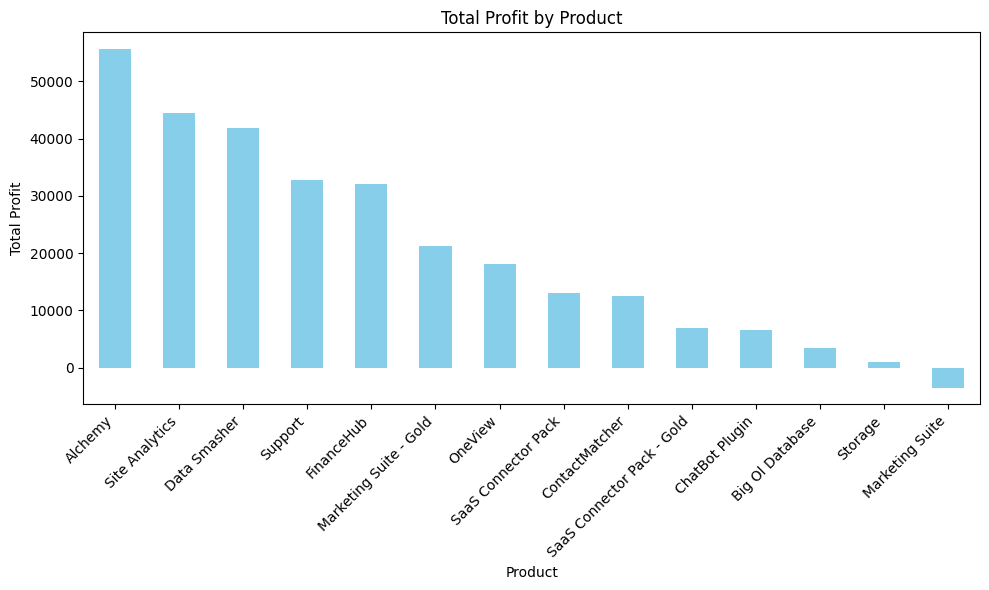

In [46]:
# Group by Product and calculate the total profit for each Product
product_profit = df.groupby('Product')['Profit'].sum()

# Sort countries by total profit in descending order
product_profit_sorted = product_profit.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
product_profit_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [47]:
# Sort product by total profit in ascending order and select the top 3
group_product = product_profit.reset_index().sort_values(by='Profit')
group_product.columns = ['Product', 'Total Profit']
group_product

,Product,Total Profit
6,Marketing Suite,-3472.5560
12,Storage,949.5182
1,Big Ol Database,3384.7569
2,ChatBot Plugin,6527.7870
10,SaaS Connector Pack - Gold,6964.1767
3,ContactMatcher,12496.2822
9,SaaS Connector Pack,13059.1436
8,OneView,18138.0054
7,Marketing Suite - Gold,21278.8264
5,FinanceHub,32136.4203


In [49]:
# Sort product by total profit in ascending order and select the top 3
top_5_product_lowest_profit = product_profit.reset_index().sort_values(by='Profit').head(5)
top_5_product_lowest_profit.columns = ['Product', 'Total Profit']
top_5_product_lowest_profit

,Product,Total Profit
6,Marketing Suite,-3472.5560
12,Storage,949.5182
1,Big Ol Database,3384.7569
2,ChatBot Plugin,6527.7870
10,SaaS Connector Pack - Gold,6964.1767


#### Marketing Suite

In [50]:
# Filter data for Product == Marketing Suite
MarketingSuite_profit = df[df['Product'] == 'Marketing Suite']

# Group by Order Year and calculate total profit for each year
MarketingSuite_profit_by_year = MarketingSuite_profit.groupby('Order Year')[['Profit']].sum().reset_index()
MarketingSuite_profit_by_year


,Order Year,Profit
0,2020,-346.1707
1,2021,-2755.2302
2,2022,212.4710
3,2023,-583.6261


In [52]:
# Calculate average_discount_per_order_per_year
total_transactions_ms = df[df['Product'] == 'Marketing Suite'].groupby('Order Year')['Order ID'].count()
ms_average_discount_per_order_per_year = df[(df['Product'] == 'Marketing Suite') & (df['Discount'] > 0)].groupby('Order Year')['Discount'].mean()
print(total_transactions_ms)
print(ms_average_discount_per_order_per_year)

Order Year
2020    37
2021    61
2022    54
2023    76
Freq: A-DEC, Name: Order ID, dtype: int64
Order Year
2020    0.253667
2021    0.309778
2022    0.277568
2023    0.291429
Freq: A-DEC, Name: Discount, dtype: float64


In [197]:
display(df[df['Product'] == 'Marketing Suite'].describe())

,Order Date,Customer ID,Sales,Quantity,Discount,Profit,Sales_Without_Discount,Cost,Hypothetical_Profit_Without_Discount
count,228,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,2022-05-04 01:34:44.210526208,1053.254386,503.859633,3.807018,0.211140,-15.230509,649.80943,519.090142,130.719288
min,2020-01-14 00:00:00,1002.000000,35.490000,1.000000,0.000000,-1665.052200,48.58000,40.807200,4.337200
25%,2021-08-03 00:00:00,1026.000000,190.500000,2.000000,0.000000,-42.631200,241.96000,209.263600,41.133200
50%,2022-06-16 12:00:00,1053.000000,306.820250,3.000000,0.200000,4.133300,392.94000,326.646000,69.676200
75%,2023-05-03 00:00:00,1080.250000,522.285000,5.000000,0.320000,40.054100,699.93000,563.920000,132.986700
max,2023-12-31 00:00:00,1101.000000,4404.900000,13.000000,0.700000,1013.127000,6166.86000,4748.482200,1418.377800
std,NaN,30.470557,638.748523,2.283352,0.191913,182.034224,816.98991,640.599024,186.440292


**Profit Analysis for Marketing Suite:**

The profit data for the Marketing Suite over the four-year period from 2020 to 2023 highlights 

**significant fluctuations:**

2020: The year started with a negative profit of -346.1707.
2021: There was a sharp decline, resulting in a substantial loss of -2755.2302.
2022: A notable recovery occurred, with a positive profit of 212.4710.
2023: The profit turned negative again, with a loss of -583.6261.

**Discount Proportions:**

The total number of discounts provided each year shows variability but generally an increasing trend:

2020: 37 discounts
2021: 61 discounts
2022: 54 discounts
2023: 76 discounts

The number of discounts increased significantly from 2020 to 2023, indicating a more aggressive discounting strategy over the years.

**Discount Percentage Proportions:**

The average discount percentages varied slightly each year:

2020: 25.37%
2021: 30.98%
2022: 27.76%
2023: 29.14%

Despite the fluctuations in discount percentages, the range remained between 25% and 31%.

Summary:
The data for the Marketing Suite indicates that the profitability has been highly inconsistent despite the variations in discounting strategy. The increase in the number of discounts from 37 in 2020 to 76 in 2023 has not resulted in a stable profit trend. The sharp loss in 2021 followed by a recovery in 2022 and another loss in 2023 suggests that the current discount strategies may not be effectively driving sustainable profits. This underscores the need for a thorough reassessment of discounting practices to achieve consistent profitability.

#### Storage

In [198]:
# Filter data for Product == Storage
storage_profit = df[df['Product'] == 'Storage']

# Group by Order Year and calculate total profit for each year
storage_profit_by_year = storage_profit.groupby('Order Year')[['Profit']].sum().reset_index()
storage_profit_by_year

,Order Year,Profit
0,2020,178.5583
1,2021,171.9376
2,2022,294.0734
3,2023,304.9489


In [199]:
# Calculate average_discount_per_order_per_year
total_transactions_st = df[df['Product'] == 'Storage'].groupby('Order Year')['Order ID'].count()
st_average_discount_per_order_per_year = df[(df['Product'] == 'Storage') & (df['Discount'] > 0)].groupby('Order Year')['Discount'].mean()
print(total_transactions_st)
print(st_average_discount_per_order_per_year)

Order Year
2020    50
2021    44
2022    59
2023    64
Freq: A-DEC, Name: Order ID, dtype: int64
Order Year
2020    0.2
2021    0.2
2022    0.2
2023    0.2
Freq: A-DEC, Name: Discount, dtype: float64


In [200]:
display(df[df['Product'] == 'Storage'].describe())

,Order Date,Customer ID,Sales,Quantity,Discount,Profit,Sales_Without_Discount,Cost,Hypothetical_Profit_Without_Discount
count,217,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,2.170000e+02
mean,2022-03-29 07:44:30.967741952,1049.041475,13.936774,4.211982,0.082028,4.375660,15.320922,9.561114,5.759807e+00
min,2020-01-07 00:00:00,1001.000000,1.240000,1.000000,0.000000,-11.825600,1.240000,0.657200,-3.552714e-15
25%,2021-03-23 00:00:00,1024.000000,5.680000,2.000000,0.000000,0.868800,5.920000,3.880800,1.353600e+00
50%,2022-05-27 00:00:00,1048.000000,10.584000,4.000000,0.000000,2.841600,11.220000,7.175700,3.615600e+00
75%,2023-02-24 00:00:00,1071.000000,17.900000,5.000000,0.200000,6.229200,19.760000,11.766000,8.771000e+00
max,2023-12-31 00:00:00,1101.000000,93.360000,14.000000,0.200000,21.888000,93.360000,92.426400,3.648000e+01
std,NaN,28.056707,12.416593,2.413551,0.098599,5.055053,13.741082,9.717534,6.095020e+00


**Profit Analysis for Storage:**

The profit data for the Storage over the four-year period from 2020 to 2023 shows a positive and consistent upward trend:

2020: The year started with a profit of 178.5583.
2021: The profit slightly decreased to 171.9376.
2022: A significant increase in profit to 294.0734.
2023: The profit further increased to 304.9489.

**Discount Proportions:**

The total number of discounts provided each year indicates an increasing trend:

2020: 50 discounts
2021: 44 discounts
2022: 59 discounts
2023: 64 discounts

There is a clear upward trend in the number of discounts, reflecting a more extensive use of discounting strategies over the years.

**Discount Percentage Proportions:**

The average discount percentages remained stable each year:

2020: 20%
2021: 20%
2022: 20%
2023: 20%

The consistency in discount percentage suggests a steady discount policy despite the increasing number of discounts.

Summary:
The data for the Storage indicates a successful discount strategy, with a consistent increase in profits from 2020 to 2023. Despite the slight dip in 2021, the overall trend is positive. The number of discounts has increased over the years, yet the discount percentage has remained constant at 20%. This consistent approach to discounting, paired with an increasing volume of discounts, appears to have effectively contributed to the rising profits. This highlights the effectiveness of a stable discount percentage strategy in driving profitability in the Storage.

#### Big Ol Database

In [201]:
# Filter data for Product == Big Ol Database
Big_Ol_Database_profit = df[df['Product'] == 'Big Ol Database']

# Group by Order Year and calculate total profit for each year
Big_Ol_Database_profit_by_year = Big_Ol_Database_profit.groupby('Order Year')[['Profit']].sum().reset_index()
Big_Ol_Database_profit_by_year

,Order Year,Profit
0,2020,369.1689
1,2021,2977.4856
2,2022,2907.3180
3,2023,-2869.2156


In [202]:
# Calculate average_discount_per_order_per_year
total_transactions_bod = df[df['Product'] == 'Big Ol Database'].groupby('Order Year')['Order ID'].count()
bod_average_discount_per_order_per_year = df[(df['Product'] == 'Big Ol Database') & (df['Discount'] > 0)].groupby('Order Year')['Discount'].mean()
print(total_transactions_bod)
print(bod_average_discount_per_order_per_year)

Order Year
2020    26
2021    24
2022    32
2023    33
Freq: A-DEC, Name: Order ID, dtype: int64
Order Year
2020    0.425000
2021    0.418750
2022    0.420833
2023    0.380769
Freq: A-DEC, Name: Discount, dtype: float64


In [203]:
display(df[df['Product'] == 'Big Ol Database'].describe())

,Order Date,Customer ID,Sales,Quantity,Discount,Profit,Sales_Without_Discount,Cost,Hypothetical_Profit_Without_Discount
count,115,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,2022-03-25 20:14:36.521739008,1049.765217,1645.553313,3.826087,0.306087,29.432669,2505.091478,1616.120644,888.970834
min,2020-03-14 00:00:00,1002.000000,11.560000,1.000000,0.000000,-6599.978000,14.450000,7.803000,6.647000
25%,2021-04-14 12:00:00,1023.000000,287.939000,2.000000,0.050000,-104.609750,472.410000,254.996250,181.480000
50%,2022-05-08 00:00:00,1048.000000,599.985000,3.000000,0.200000,38.997400,1035.800000,680.980500,376.420000
75%,2023-02-22 12:00:00,1080.000000,2120.938000,5.000000,0.500000,219.525650,2896.980000,1703.978700,921.915000
max,2023-12-26 00:00:00,1101.000000,22638.480000,11.000000,0.700000,2799.984000,45276.960000,24449.558400,20827.401600
std,NaN,31.094460,2765.102088,2.165361,0.252804,1099.070067,4938.688449,2978.811784,2054.958780


### ChatBot Plugin

In [54]:
# Filter data for Product == ChatBot Plugin
ChatBot_Plugin_profit = df[df['Product'] == 'ChatBot Plugin']

# Group by Order Year and calculate total profit for each year
ChatBot_Plugin_profit_by_year = ChatBot_Plugin_profit.groupby('Order Year')[['Profit']].sum().reset_index()
ChatBot_Plugin_profit_by_year


,Order Year,Profit
0,2020,1406.8031
1,2021,1485.0582
2,2022,1408.7534
3,2023,2227.1723


In [55]:
# Calculate average_discount_per_order_per_year
total_transactions_ms = df[df['Product'] == 'ChatBot Plugin'].groupby('Order Year')['Order ID'].count()
ms_average_discount_per_order_per_year = df[(df['Product'] == 'ChatBot Plugin') & (df['Discount'] > 0)].groupby('Order Year')['Discount'].mean()
print(total_transactions_ms)
print(ms_average_discount_per_order_per_year)


display(df[df['Product'] == 'ChatBot Plugin'].describe())

Order Year
2020    164
2021    167
2022    181
2023    284
Freq: A-DEC, Name: Order ID, dtype: int64
Order Year
2020    0.2
2021    0.2
2022    0.2
2023    0.2
Freq: A-DEC, Name: Discount, dtype: float64


,Order Date,Customer ID,Sales,Quantity,Discount,Profit,Sales_Without_Discount,Cost,Hypothetical_Profit_Without_Discount
count,796,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,2022-04-26 09:49:44.924622848,1050.597990,34.068834,3.768844,0.074874,8.200737,36.928178,25.868097,11.060082
min,2020-01-06 00:00:00,1001.000000,1.344000,1.000000,0.000000,0.153300,1.640000,0.840000,0.498400
25%,2021-04-24 18:00:00,1024.000000,7.980000,2.000000,0.000000,1.684800,8.640000,6.085550,2.601000
50%,2022-07-08 12:00:00,1051.000000,15.504000,3.000000,0.000000,3.723600,16.740000,11.387350,5.489600
75%,2023-05-24 06:00:00,1078.000000,36.440000,5.000000,0.200000,8.677175,39.680000,26.804925,12.169300
max,2023-12-30 00:00:00,1101.000000,1113.024000,14.000000,0.200000,112.574000,1391.280000,1001.721600,389.558400
std,NaN,30.336589,60.122465,2.131957,0.096853,13.384264,68.393975,49.053393,19.601603


**Profit Analysis for ChatBot Plugin**

The profit data for ChatBot Plugin over the four-year period from 2020 to 2023 demonstrates a consistent and growing trend:

2020: The profit stood at 1406.8031.
2021: There was a slight increase in profit to 1485.0582.
2022: The profit remained stable at 1408.7534.
2023: The profit saw a significant jump to 2227.1723.

This indicates a steady and robust growth in profitability, with a particularly notable increase in 2023.

**Discount Proportions**
The total number of discounts provided each year shows a clear upward trend:

2020: 164 discounts
2021: 167 discounts
2022: 181 discounts
2023: 284 discounts

This steady increase in the number of discounts reflects an aggressive discounting strategy, especially marked by the substantial rise in 2023.

** Discount Percentage Proportions:**

The average discount percentages remained stable throughout the period:

2020: 20%
2021: 20%
2022: 20%
2023: 20%

The consistency in the discount percentage indicates a steady discount policy applied each year.

Summary:

The data for ChatBot Plugin highlights a positive and growing profit trend from 2020 to 2023, culminating in a significant profit increase in 2023. The total number of discounts offered each year increased steadily, especially in 2023, suggesting a more aggressive discount strategy.

Despite the increase in the number of discounts, the average discount percentage remained consistent at 20% each year. This stable discount rate, combined with the increasing volume of discounts, appears to have contributed to the rising profitability.

The significant jump in profits in 2023 suggests that the strategy of maintaining a stable discount rate while increasing the number of discounts has been effective for the ChatBot Plugin, indicating a strong market response to this approach.

In [204]:
# Group Products based on total real profit and hypothetical profit without discounts
total_profit_original = df.groupby('Product')['Profit'].sum()
total_profit_hypothetical = df.groupby('Product')['Hypothetical_Profit_Without_Discount'].sum()

# Combine the result for camparasion
comparison = pd.DataFrame({
    'Total Profit Original': total_profit_original,
    'Total Profit Hypothetical Without Discount': total_profit_hypothetical
})

comparison
comparison_sorted_product = comparison.sort_values(by='Total Profit Original', ascending=True)
comparison_sorted_product

,Total Profit Original,Total Profit Hypothetical Without Discount
Product,,
Marketing Suite,-3472.5560,29803.9977
Storage,949.5182,1249.8782
Big Ol Database,3384.7569,102231.6459
ChatBot Plugin,6527.7870,8803.8250
SaaS Connector Pack - Gold,6964.1767,8431.6647
ContactMatcher,12496.2822,211542.6372
SaaS Connector Pack,13059.1436,28928.8596
OneView,18138.0054,37588.4244
Marketing Suite - Gold,21278.8264,37776.2884


In [205]:
comparison_sorted_product = comparison.sort_values(by='Total Profit Original', ascending=True)

# showing top 3 Countries to check sensivity using discount
most_sensitive__product = comparison_sorted_product.head(3)

# calculate the difference profit
most_sensitive__product['Profit Difference'] = most_sensitive__product['Total Profit Original'] - most_sensitive__product['Total Profit Hypothetical Without Discount']

# calculating sensitivity
most_sensitive__product['Profit Sensitivity'] = most_sensitive__product['Profit Difference'] / (most_sensitive__product['Total Profit Original'] + most_sensitive__product['Total Profit Hypothetical Without Discount'])
most_sensitive__product

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10452\1423451364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_sensitive__product['Profit Difference'] = most_sensitive__product['Total Profit Original'] - most_sensitive__product['Total Profit Hypothetical Without Discount']
C:\Users\LEGION\AppData\Local\Temp\ipykernel_10452\1423451364.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_sensitive__product['Profit Sensitivity'] = most_sensitive__product['Profit Difference'] / (most_sensitive__pro

,Total Profit Original,Total Profit Hypothetical Without Discount,Profit Difference,Profit Sensitivity
Product,,,,
Marketing Suite,-3472.5560,29803.9977,-33276.5537,-1.263757
Storage,949.5182,1249.8782,-300.3600,-0.136565
Big Ol Database,3384.7569,102231.6459,-98846.8890,-0.935905


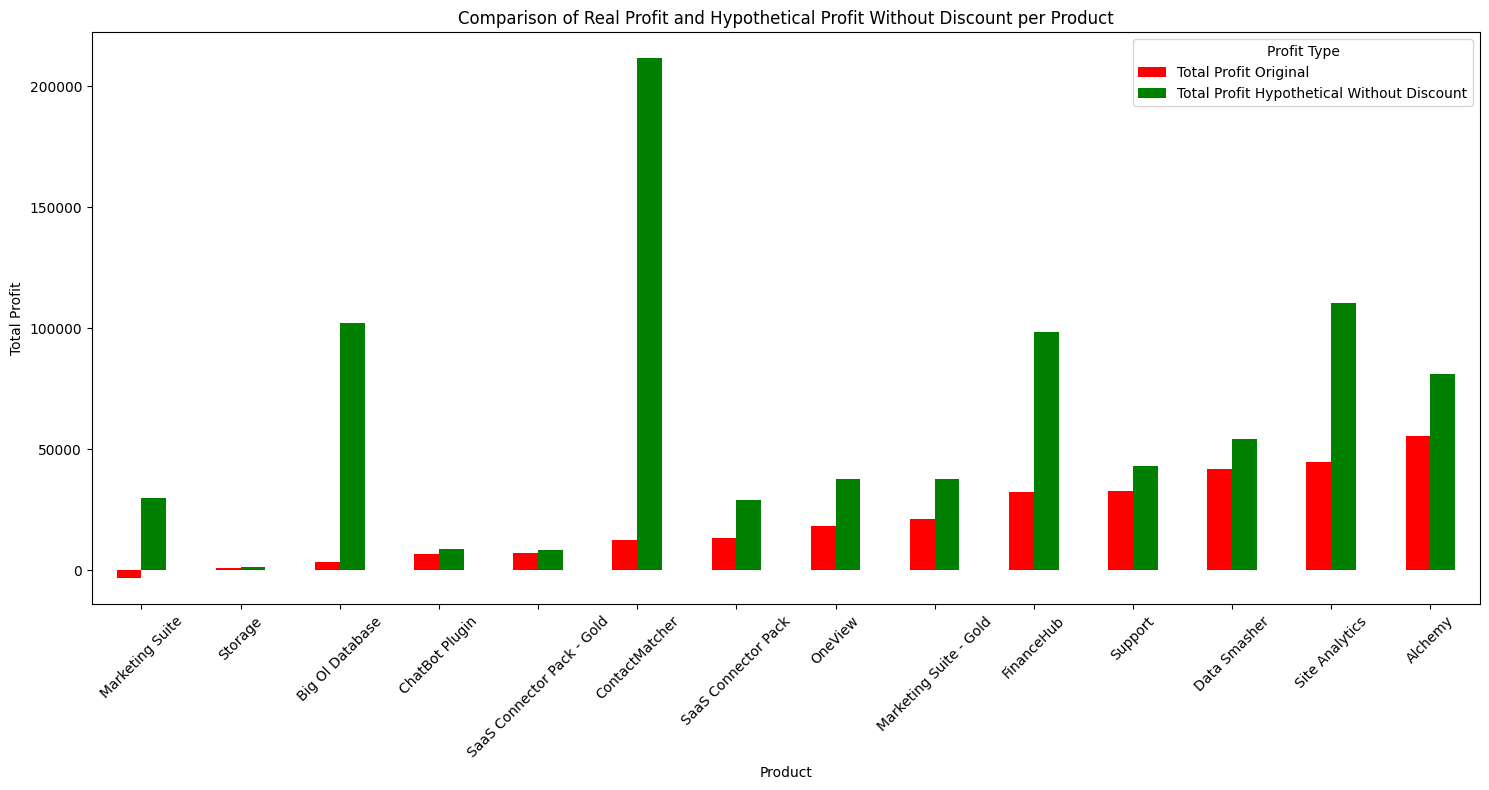

In [206]:
comparison_sorted_product.plot(kind='bar', figsize=(15, 8), color=['red', 'green'])
plt.title('Comparison of Real Profit and Hypothetical Profit Without Discount per Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.legend(title='Profit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Highlight**

**1. Comparison of Total Profit Original vs Total Profit Hypothetical Without Discount**

The comparison reveals a significant difference between the profits obtained when considering discounts (Total Profit Original) and the profits hypothetically calculated without discounts (Total Profit Hypothetical 
Without Discount) for each product. Notably, the Total Profit Hypothetical Without Discount is substantially higher than the Total Profit Original, indicating the potential impact of discounts on reducing overall profitability.

**2. Top 3 Products with Lowest Profit**

The Marketing Suite product stands out as having the lowest profit among the top 3 products, followed by Storage and Big Ol Database.


- Marketing Suite: 
<br>
The original total profit for Marketing Suite is negative at -3472.5560, while the hypothetical total profit without discounts is significantly higher at 29803.9977. The profit difference is substantial, at -33276.5537. The profit sensitivity is -1.263757, indicating that the use of discounts significantly impacts profit for the Marketing Suite product.

- Storage: 
<br>
The original total profit for Storage is positive at 949.5182, while the hypothetical total profit without discounts is slightly higher at 1249.8782. The profit difference is negative at -300.3600. The profit sensitivity is -0.136565, suggesting that the use of discounts has a minor negative impact on profit for the Storage product.

- Big Ol Database: 
<br>
The original total profit for Big Ol Database is positive at 3384.7569, while the hypothetical total profit without discounts is significantly higher at 102231.6459. The profit difference is substantial, at -98846.8890. The profit sensitivity is -0.935905, indicating that the use of discounts has a significant negative impact on profit for the Big Ol Database product.

**3. Profit Trends Over the Years**

The profit trends for each product vary across the years, showcasing fluctuations in profitability. Notably, some products experience negative profits in certain years, indicating potential challenges or shifts in market dynamics.

**4. Average Discount Usage Over the Years**

The average discount usage per transaction remains relatively consistent over the years for each product, suggesting a persistent reliance on discounting strategies to drive sales or attract customers. Despite variations in profitability, the average discount usage remains stable, indicating a consistent promotional approach adopted by businesses.


Overall, these highlights underscore the complex relationship between discount usage and profitability, as well as the importance of analyzing profit trends and discount strategies to inform business decisions effectively. Especially,the Marketing Suite and Big Ol Database products are highly sensitive to discount usage, with significant profit differences and negative profit sensitivity, while the Storage product is less sensitive to discount usage, with a smaller profit difference and a slightly negative profit sensitivity.

## Analysis of the potential use of maximum discounts to increase profits based on product on each Country

In this session, as a Data Scientist, I conducted an initial analysis based on Basic Data and previous analysis  to determine whether using maximum discounts could potentially increase profit based on the product in each low-profit country. To do this, the data was filtered by 'Product', and the number of unique discounts and total profits for each product were calculated. If there is more than one unique discount for a product that has a negative profit value, I examined whether any of these discounts resulted in a positive profit. If such a discount exists, it would be recommended.

### Japan

In [210]:
# Checking Product and Profit
transactions_japan = df[df['Country'] == 'Japan']
product_discount_profit_japan = transactions_japan.groupby(['Product', 'Discount'])['Profit'].mean().sort_values(ascending = True).reset_index()
product_discount_profit_japan

,Product,Discount,Profit
0,Big Ol Database,0.40,-205.141800
1,OneView,0.80,-130.791968
2,ContactMatcher,0.80,-96.111593
3,Marketing Suite,0.32,-88.560656
4,ContactMatcher,0.30,-67.172018
5,FinanceHub,0.30,-41.240148
6,SaaS Connector Pack,0.60,-40.897267
7,Marketing Suite - Gold,0.20,-9.201270
8,Storage,0.20,3.363987
9,ChatBot Plugin,0.20,4.455687


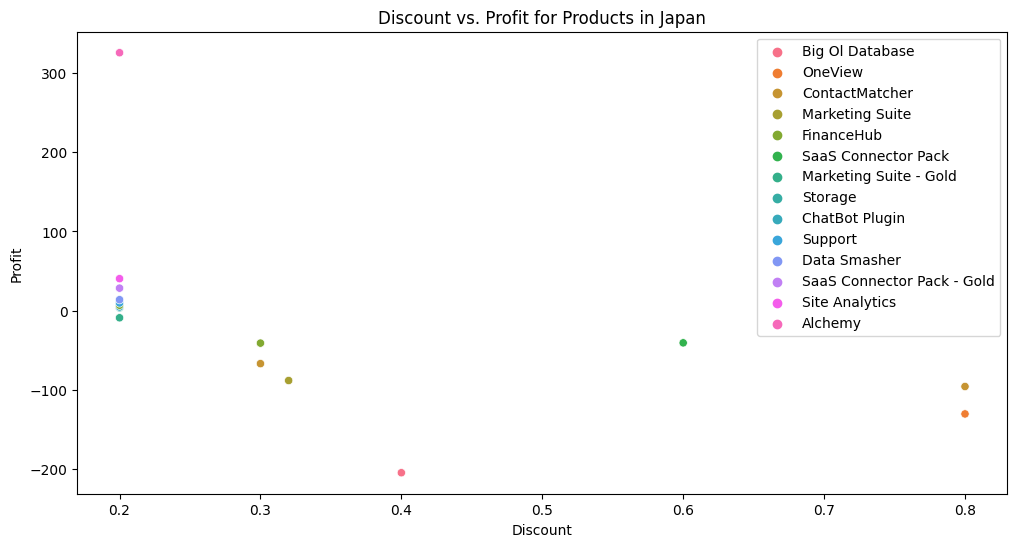

In [211]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=product_discount_profit_japan, x='Discount', y='Profit', hue='Product')
plt.title('Discount vs. Profit for Products in Japan')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Group the filtered data by 'Product' and calculate the number of unique discounts and total profit for each product
product_discount_profit_Japan = transactions_japan.groupby('Product').agg({'Discount': 'nunique', 'Profit': 'sum'})

# Rename the columns for clarity
product_discount_profit_Japan.columns = ['Unique Discounts', 'Total Profit']
products_with_multiple_discounts = product_discount_profit_Japan[product_discount_profit_Japan['Unique Discounts'] > 1]

products_with_multiple_discounts

,Unique Discounts,Total Profit
Product,,
ContactMatcher,2,-16921.7504
FinanceHub,2,-2315.2470


In [ ]:
FinanceHub_japan = df[(df['Product'] == 'FinanceHub') & (df['Country'] == 'Japan')].groupby('Discount')['Profit'].sum().sort_values(ascending=True)
FinanceHub_japan

Discount
0.3   -2515.649
0.2     200.402
Name: Profit, dtype: float64

In [ ]:
ContactMatcher_japan = df[(df['Product'] == 'ContactMatcher') & (df['Country'] == 'Japan')].groupby('Discount')['Profit'].sum().sort_values(ascending=True)
ContactMatcher_japan

Discount
0.8   -14705.0738
0.3    -2216.6766
Name: Profit, dtype: float64

### Mexico

In [ ]:
# Checking Product and Profit
transactions_Mexico = df[df['Country'] == 'Mexico']
product_discount_profit_Mexico = transactions_Mexico.groupby(['Product', 'Discount'])['Profit'].mean().sort_values(ascending = True)
product_discount_profit_Mexico


Product                     Discount
Big Ol Database             0.7        -1471.368088
Marketing Suite             0.5         -169.881450
ContactMatcher              0.4         -169.708406
Site Analytics              0.4          -59.124634
FinanceHub                  0.3          -28.232791
ContactMatcher              0.7          -19.187234
Marketing Suite - Gold      0.2           -7.468551
ChatBot Plugin              0.2            2.647118
FinanceHub                  0.2            4.270938
Storage                     0.2            4.365693
Support                     0.2           10.494433
SaaS Connector Pack         0.2           11.248241
SaaS Connector Pack - Gold  0.2           16.217092
OneView                     0.2           21.141535
Data Smasher                0.2           33.787677
Alchemy                     0.4          111.748075
Name: Profit, dtype: float64

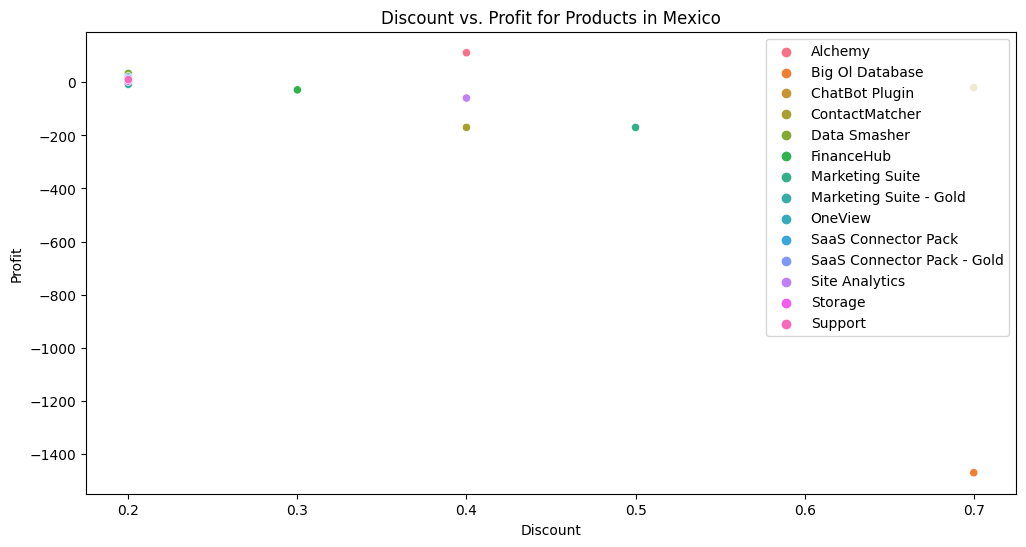

In [ ]:
# Scatter
plt.figure(figsize=(12, 6))
sns.scatterplot(data=product_discount_profit_Mexico, x='Discount', y='Profit', hue='Product')
plt.title('Discount vs. Profit for Products in Mexico')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Group the filtered data by 'Product' and calculate the number of unique discounts and total profit for each product
product_discount_profit_Mexico = transactions_Mexico.groupby('Product').agg({'Discount': 'nunique', 'Profit': 'sum'})

# Rename the columns for clarity
product_discount_profit_Mexico.columns = ['Unique Discounts', 'Total Profit']
products_with_multiple_discounts = product_discount_profit_Mexico[product_discount_profit_Mexico['Unique Discounts'] > 1]

products_with_multiple_discounts

,Unique Discounts,Total Profit
Product,,
ContactMatcher,2,-4116.0026
FinanceHub,2,-593.8320


In [ ]:
FinanceHub_mexico = df[(df['Product'] == 'FinanceHub') & (df['Country'] == 'Mexico')].groupby('Discount')['Profit'].sum().sort_values(ascending=True)
FinanceHub_mexico

Discount
0.3   -649.3542
0.2     55.5222
Name: Profit, dtype: float64

In [ ]:
ContactMatcher_mexico = df[(df['Product'] == 'ContactMatcher') & (df['Country'] == 'Mexico')].groupby('Discount')['Profit'].sum().sort_values(ascending=True)
ContactMatcher_mexico

Discount
0.4   -2715.3345
0.7   -1400.6681
Name: Profit, dtype: float64

### France

In [215]:
# Checking Product and Profit
transactions_France = df[df['Country'] == 'France']
product_discount_profit_France = transactions_France.groupby(['Product', 'Discount'])['Profit'].mean().sort_values(ascending = True).reset_index()
product_discount_profit_France

,Product,Discount,Profit
0,Big Ol Database,0.7,-317.035086
1,Marketing Suite,0.5,-289.676010
2,ContactMatcher,0.4,-172.583587
3,Site Analytics,0.4,-58.176252
4,FinanceHub,0.3,-55.372722
5,ContactMatcher,0.7,-46.642602
6,Marketing Suite - Gold,0.2,-29.271669
7,Support,0.2,-8.289082
8,Storage,0.2,2.094443
9,ChatBot Plugin,0.2,3.443953


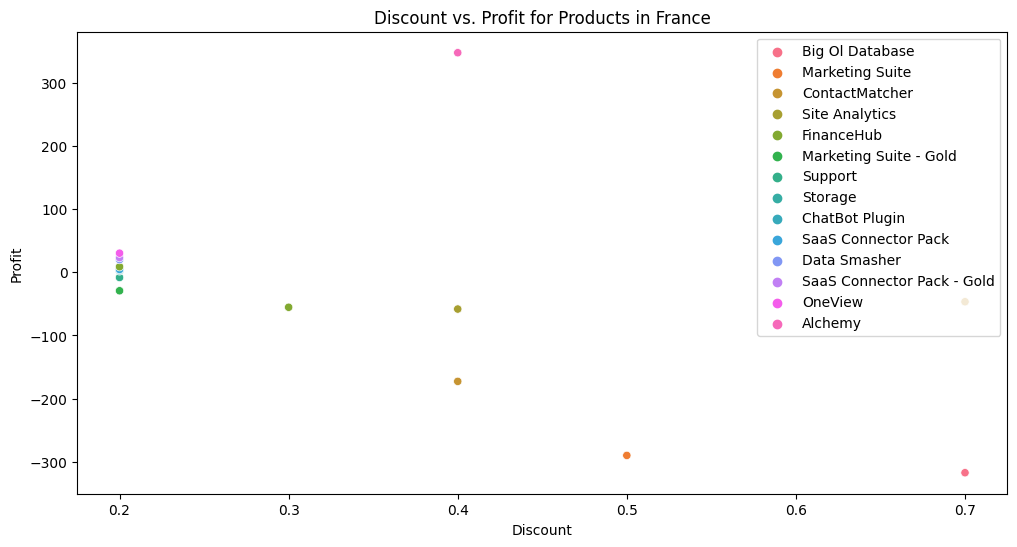

In [220]:
# Scatter 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=product_discount_profit_France, x='Discount', y='Profit', hue='Product')
plt.title('Discount vs. Profit for Products in France')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Filter the DataFrame to include only transactions in France
transactions_France = df[df['Country'] == 'France']

# Group the filtered data by 'Product' and calculate the number of unique discounts and total profit for each product
product_discount_profit_France = transactions_France.groupby('Product').agg({'Discount': 'nunique', 'Profit': 'sum'})

# Rename the columns for clarity
product_discount_profit_France.columns = ['Unique Discounts', 'Total Profit']
products_with_multiple_discounts = product_discount_profit_France[product_discount_profit_France['Unique Discounts'] > 1]

products_with_multiple_discounts

,Unique Discounts,Total Profit
Product,,
ContactMatcher,2,-7159.7288
FinanceHub,2,-1791.9972


In [ ]:
FinanceHub_france = df[(df['Product'] == 'FinanceHub') & (df['Country'] == 'France')].groupby('Discount')['Profit'].sum().sort_values(ascending=True)
FinanceHub_france

Discount
0.3   -1993.4180
0.2     201.4208
Name: Profit, dtype: float64

In [ ]:
ContactMatcher_france = df[(df['Product'] == 'ContactMatcher') & (df['Country'] == 'France')].groupby('Discount')['Profit'].sum().sort_values(ascending=True)
ContactMatcher_france

Discount
0.7   -4570.9750
0.4   -2588.7538
Name: Profit, dtype: float64

In [91]:
# Filter transactions for the specified countries and product
transactions_3 = df[(df['Country'].isin(['Japan', 'Mexico', 'France'])) & df['Product'].isin(['FinanceHub','ContactMatcher','Big Ol Database','OneView','Sitee Analytics','SaaS Connector Pack'])]

# Group by Product and Discount to get mean profit, then sort
product_discount_profit_3 = transactions_3.groupby(['Product', 'Discount'])['Profit'].sum().sort_values(ascending=True).reset_index()

# Display the product discount profit
print(product_discount_profit_3)

# Group by Product to get the number of unique discounts and the total profit
product_discount_profit_3_agg = transactions_3.groupby('Product').agg({'Discount': 'nunique', 'Profit': 'sum'}).reset_index()

# Rename the columns for clarity
product_discount_profit_3_agg.columns = ['Product', 'Unique Discounts', 'Total Profit']

# Filter products with more than one unique discount
products_with_multiple_3 = product_discount_profit_3_agg[product_discount_profit_3_agg['Unique Discounts'] > 1]

# Display the products with multiple unique discounts
products_with_multiple_3

                Product  Discount      Profit
0        ContactMatcher       0.8 -14705.0738
1       Big Ol Database       0.7 -13990.1903
2               OneView       0.8  -6147.2225
3        ContactMatcher       0.7  -5971.6431
4        ContactMatcher       0.4  -5304.0883
5            FinanceHub       0.3  -5158.4212
6   SaaS Connector Pack       0.6  -3312.6786
7       Big Ol Database       0.4  -2666.8434
8        ContactMatcher       0.3  -2216.6766
9            FinanceHub       0.2    457.3450
10  SaaS Connector Pack       0.2    799.6311
11              OneView       0.2   1180.4703


,Product,Unique Discounts,Total Profit
0,Big Ol Database,2,-16657.0337
1,ContactMatcher,4,-28197.4818
2,FinanceHub,2,-4701.0762
3,OneView,2,-4966.7522
4,SaaS Connector Pack,2,-2513.0475


**Highlight**

The analysis revealed that only two products, ContactMatcher and FinanceHub, had more than one unique discount. Among these, only the FinanceHub product in Japan and France had a discount that could potentially be used to maximize profit. Here are the detailed findings:

**1. Japan**

ContactMatcher

- Unique Discounts: 2
- Total Profit: -16921.7504 (Negative Profit)
- Discount Analysis:
1. 0.8: -14705.0738
1. 0.3: -2216.6766
- Summary: Both discounts lead to negative profits. No positive profit observed with available discounts for ContactMatcher.


FinanceHub

- Unique Discounts: 2
- Total Profit: -2315.2470
- Discount Analysis:
1. 0.3: -2515.649 (negative profit)
1. 0.2: 200.402 (positive profit)
- Summary: The discount of 0.2 leads to a positive profit, suggesting it as a potential maximum discount to increase profits.


**2. Mexico**

ContactMatcher

- Unique Discounts: 2
- Total Profit: -4116.0026
- Discount Analysis:
1. 0.4: -2715.3345
1. 0.7: -1400.6681
- Summary: Both discounts result in negative profits.


FinanceHub

- Unique Discounts: 2
- Total Profit: -593.8320
- Discount Analysis:
1. 0.3: -649.3542 (negative profit)
1. 0.2: 55.5222 (positive profit)
- Summary: The discount of 0.2 results in a positive profit, suggesting it as a potential maximum discount to increase profits.


**3. France**

ContactMatcher

- Unique Discounts: 2
- Total Profit: -7159.7288
- Discount Analysis:
1. 0.7: -4570.9750
1. 0.4: -2588.7538
- Summary: Both discounts lead to negative profits.


FinanceHub

- Unique Discounts: 2
- Total Profit: -1791.9972
- Discount Analysis:
1. 0.3: -1993.4180 (negative profit)
1. 0.2: 201.4208 (positive profit)
- Summary: The discount of 0.2 results in a positive profit, suggesting it as a potential maximum discount to increase profits.


**In summary**, the analysis indicates that the FinanceHub product in Japan, Mexico, and France has the potential for profit increase with a maximum 0.2 discount. Other products and discounts, particularly for ContactMatcher, did not show positive profit outcomes under the given conditions.

**In General** 

The analysis of product discount impacts reveals significant profit losses for several key products when high discount levels are applied. 

- ContactMatcher experiences the most substantial losses, with a 70% to 80% discount resulting in a profit drop ranging from -$5,971.64 to -$14,705.07.

- Similarly, Big Ol Database incurs a loss of -$13,990.19 with a 70% discount. 

- OneView also faces a notable loss of -$6,147.22 at an 80% discount but turns a positive profit of $1,180.47 at a 20% discount. 

- FinanceHub follows a similar pattern, with a -$5,158.42 loss at a 30% discount but a positive profit of $457.35 at a 20% discount.

- SaaS Connector Pack also shows a positive profit of $799.63 at a 20% discount, despite a -$3,312.68 loss at a 60% discount. 

These findings underscore the critical need for strategic discount management to prevent substantial losses and enhance overall profitability.

**Insights**

High Discounts Lead to Losses: Products like ContactMatcher and Big Ol Database suffer significant losses when discounts reach 70% or higher.
Potential for Positive Profit with Lower Discounts: FinanceHub and SaaS Connector Pack show positive profit margins when discounts are limited to 20%.
Conclusion:

Strategic Discounting Needed: These findings highlight the importance of carefully managing discount levels to avoid substantial profit losses and maximize profitability.

In [30]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,...,License,Sales,Quantity,Discount,Profit,YearMonth,Discounted,Sales_Without_Discount,Cost,Hypothetical_Profit_Without_Discount
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,...,16GRM07R1K,261.9600,2,0.00,41.9136,2022-11,False,261.96,220.0464,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,...,QLIW57KZUV,731.9400,3,0.00,219.5820,2022-11,False,731.94,512.3580,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,...,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022-06,False,14.62,7.7486,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,...,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021-10,True,1741.05,1340.6085,400.4415
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,...,OIF7NY23WD,22.3680,2,0.20,2.5164,2021-10,True,27.96,19.8516,8.1084


# **Additional Analysis: Countries are sensitive to Profit when using discounts**

In [97]:
# Filter discounts greater than 0
filtered_df = df[df['Discount'] > 0]

# Group by Country and Discount to get mean profit, then sort
product_discount_profit_3 = filtered_df.groupby(['Country', 'Discount'])['Profit'].mean().sort_values(ascending=True).reset_index()

# Display the product discount profit
product_discount_profit_3

,Country,Discount,Profit
0,Sweden,0.5,-1346.202150
1,Sweden,0.4,-460.531738
2,South Africa,0.4,-332.926725
3,Germany,0.5,-329.335167
4,France,0.5,-289.676010
...,...,...,...
58,United Kingdom,0.2,79.297479
59,United Kingdom,0.1,93.565946
60,Slovenia,0.2,100.196000
61,Brazil,0.1,106.564728


In [60]:
# Filter for discounts lowest than 0.3
filtered_df = df[df['Discount'] < 0.3]

# Group by Country and calculate the mean profit
country_profit = filtered_df.groupby('Country')['Profit'].mean().reset_index()

# Identify countries with negative mean profits
profitable_countries = country_profit[country_profit['Profit'] != 0]

# Display the countries that are not profitable when using discounts lowest than 0.3
print(profitable_countries)

                 Country      Profit
0              Argentina   76.751597
1              Australia   22.079946
2                Austria  105.958930
3                Belgium    9.479159
4                 Brazil   95.934069
5                 Canada   66.013146
6                  Chile   13.223231
7                  China   68.954328
8               Colombia   42.120395
9             Costa Rica   53.607742
10               Croatia   32.902358
11        Czech Republic   52.288150
12               Denmark   56.810775
13                 Egypt  204.088936
14               Finland   88.315453
15                France    1.638805
16               Germany   12.811207
17                Greece   69.685354
18               Iceland   87.625067
19                 India  123.375411
20             Indonesia   34.851813
21               Ireland   81.342509
22                Israel   85.045279
23                 Italy   76.380004
24                 Japan   14.431448
25            Luxembourg  121.608847
2

In [63]:
# Filter for discounts greater than 0.2
filtered_df = df[df['Discount'] > 0.2]

# Group by Country and calculate the mean profit
country_profit = filtered_df.groupby('Country')['Profit'].mean().reset_index()

# Identify countries with negative mean profits
unprofitable_countries = country_profit[country_profit['Profit'] != 0].sort_values(by = 'Profit', ascending=True)

# Display the countries that are not profitable when using discounts greater than 0.2
print(unprofitable_countries)

           Country      Profit
17          Sweden -230.768498
13          Russia -185.171341
15    South Africa -168.557472
18  United Kingdom -161.987171
3            Chile -114.575336
10          Mexico -113.001221
7           Greece -105.316400
2          Belgium  -89.099433
6          Germany  -86.069673
9            Japan  -81.819956
1        Australia  -80.864004
16     South Korea  -77.899243
8          Iceland  -76.953600
5           France  -69.270803
11          Norway  -57.541950
12     Philippines  -42.948150
4            China  -35.558500
0        Argentina  -25.645300
14    Saudi Arabia   -9.807300


In [102]:
# Filter discounts greater than 0
filtered_2_df = df[df['Discount'] < 0.3]

# Group by Country and Discount to get mean profit, then sort
filter_country = filtered_2_df.groupby(['Country', 'Discount'])['Profit'].mean().sort_values(ascending=True).reset_index()

# Display the product discount profit
filter_country

,Country,Discount,Profit
0,France,0.20,1.638805
1,South Africa,0.20,8.555888
2,Taiwan,0.20,9.241556
3,Belgium,0.20,9.479159
4,Mexico,0.20,11.227041
5,Russia,0.20,11.736820
6,Germany,0.20,12.811207
7,Chile,0.20,13.223231
8,Japan,0.20,14.431448
9,Sweden,0.20,17.840675


In [64]:
# Calculate the total original profit per country
total_profit_original_per_country = df.groupby('Country')['Profit'].sum().reset_index()
total_profit_original_per_country.columns = ['Country', 'Total Profit Original']

# Filter discounts less than 0.3
filtered_2_df = df[df['Discount'] < 0.3]

# Group by Country and Discount to get mean profit, then sort
filter_country = filtered_2_df.groupby(['Country', 'Discount'])['Profit'].mean().sort_values(ascending=True).reset_index()

# Merge with the total original profit per country
filter_country = filter_country.merge(total_profit_original_per_country, on='Country')

# Sort by Total Profit Original
filter_country = filter_country.sort_values(by='Total Profit Original', ascending=True)

# Display the product discount profit with total original profit
filter_country

,Country,Discount,Profit,Total Profit Original
9,Japan,0.20,14.431448,-25729.3563
5,Mexico,0.20,11.227041,-16971.3766
0,France,0.20,1.638805,-15559.9603
15,Australia,0.20,22.079946,-12607.8870
10,Sweden,0.20,17.840675,-7490.9122
6,Russia,0.20,11.736820,-6527.8579
1,South Africa,0.20,8.555888,-5341.6936
8,Chile,0.20,13.223231,-3427.9246
7,Germany,0.20,12.811207,-3399.3017
4,Belgium,0.20,9.479159,-1190.4705


**Highlight the findings**

**Countries Profitable with Discounts < 0.3:**

These countries have shown profitability when utilizing discounts lower than 0.3. Despite offering discounts, they have managed to maintain positive mean profits, indicating that the discounts applied have not significantly impacted their overall profitability.

For example, countries like Argentina, Australia, and Austria demonstrate positive mean profits even with discounts below 0.3, suggesting that they effectively balance discounting strategies with profitability.

**Countries Unprofitable with Discounts > 0.2:**

In contrast, these countries have experienced profitability issues when utilizing discounts greater than 0.2. The negative mean profit values indicate that the discounts applied have led to losses in profitability for these countries.
Notably, countries like Sweden, Russia, and South Africa appear in this list, suggesting that discounts exceeding 0.2 can result in significant profit losses for them.

**Highlight:**
The analysis suggests that there's a delicate balance between offering discounts and maintaining profitability for different countries. While discounts lower than 0.3 appear to maintain profitability for many countries, discounts exceeding 0.2 can lead to significant profit losses for certain regions. It underscores the importance of carefully evaluating discounting strategies and their impact on profitability, especially in regions where profitability is sensitive to discount levels. Adjusting discount strategies within the appropriate thresholds could help maximize profitability while still attracting customers.

# **Conclusion**

The analysis reveals significant insights into the impact of discount strategies on profitability, as well as the varying effects across different products and countries especially for lower performance. Here are the key conclusions drawn from the analysis:


**Overall Discount Impact**, High discount levels particurally over than 20%, often fail to translate into profitability, as evidenced by entries with no profit despite substantial discounts. High discount percentages, consistently correlate with negative profit, indicating that such discounts are detrimental to profitability. Conversely, transactions without discounts or using discount < 20 %, consistently show positive profit percentages, highlighting the potential for enhanced profitability by avoiding excessive use of discount. The analysis of the correlation coefficient between discount and profit reveals a weak negative correlation (-0.22), suggesting that as discounts increase, profits tend to decrease slightly. However, the relationship is not strong, emphasizing the need for a balanced discounting strategy to avoid negatively impacting overall profitability.
<br>

**Country-Level Profitability Analysis**, High-performing countries like the United States and the United Kingdom contrast sharply with low-performing countries such as France, Mexico, and Japan, which exhibit significant negative profits. This disparity underscores varying market dynamics and potential issues in lower-performing regions, necessitating further investigation and potential improvement strategies.
<br>

**Impact on Low-Profit Products**, The analysis of low-profit products highlights the substantial difference between profits obtained with and without discounts. Particularly, products like the Marketing Suite and Big Ol Database exhibit significant negative profit sensitivity to discount usage, emphasizing the need for careful consideration of discount strategies to optimize profitability.


The analysis shows how discounts affect profitability across products and countries, especially for underperforming areas. High discount levels, often don't lead to profits, with negative profits despite big discounts. Transactions without discounts consistently show positive profits, suggesting avoiding excessive discounting could boost profitability. The correlation between discount and profit is weakly negative (-0.22), meaning as discounts rise, profits slightly dip, stressing the need for balanced discount strategies. In terms of countries, high performers like the US and UK contrast starkly with low performers like France, Mexico, Japan Autralia, and Sweden, which face significant negative profits. For low-profit products like Marketing Suite and Big Ol Database, discounts significantly impact profitability, urging careful discount strategy planning for better results.

# **Recommendation**

Based on the analysis conducted on the potential impact of maximum discounts on profit margins for various products in low-profit countries, it is advised to implement a strategic discounting approach, with particular focus on the FinanceHub product in Japan, Mexico, and France. The analysis indicates that applying a maximum discount rate of 0.2 yields positive profit outcomes for FinanceHub in these regions, suggesting a potential for increased profitability.

**Key Findings and Insights**
- Country Analysis: Lowest Performance Countries show promise for profit enhancement with the FinanceHub product when a maximum discount rate of 0.2 is applied.

- Product Sensitivity: Products like FinanceHub respond positively to moderate discounts, while ContactMatcher consistently results in negative profits, irrespective of the discount rate.

- Country Sensitivity: The data highlights that countries such as Japan, Mexico, France, Australia, and others face substantial negative impacts on profitability when applying discounts over 0.2. These findings underscore the need for a tailored discount strategy to mitigate financial losses and enhance overall profitability.


**Implications and Next Steps**

- Strategic Discounting: Companies operating in low-profit countries should adopt a strategic approach to discounting, focusing on products like FinanceHub that have demonstrated profit potential. This requires a thorough analysis of market demand, consumer preferences, and the competitive landscape to optimize discounting strategies.

- Further Analysis: Conducting in-depth analysis of the relationship between discount levels, sales volume, and profitability will offer deeper insights into optimal discounting strategies for each product and country. Additionally, exploring alternative promotional tactics beyond discounts, such as loyalty programs or bundled offers, can provide additional pathways to driving sales and enhancing profitability.

The strategic use of discounts, particularly for products with demonstrated profit potential, can be a valuable tool for businesses aiming to enhance profitability in low-profit countries. By understanding the specific nuances of each segmentation and product, businesses can develop tailored discounting strategies that effectively drive sales and maximize profitability.